In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math

data = pd.read_csv('./data/taxi_sz_data.csv')

#清洗数据
#后一位数和前一位数相等
#中间数和前一位数和后一位数都不相等
#三个相邻的车牌号相等

data=data.sort_values(by=['VehicleNum','Stime'])
data = data[-((data['OpenStatus'].shift(-1) == data['OpenStatus'].shift())&
              (data['OpenStatus'].shift(-1) != data['OpenStatus'])&
             (data['VehicleNum'].shift(-1) == data['VehicleNum'].shift())&
             (data['VehicleNum'].shift(-1) == data['VehicleNum']))]
data=data.dropna()
len(data)

1598866

In [2]:
df=data[data['VehicleNum']==22271]
df[df['OpenStatus']==1]

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed


[Text(0.5, 0, '商店名'), Text(0.5, 1.0, '平均库存量平均价格与商店名之间的关系')]

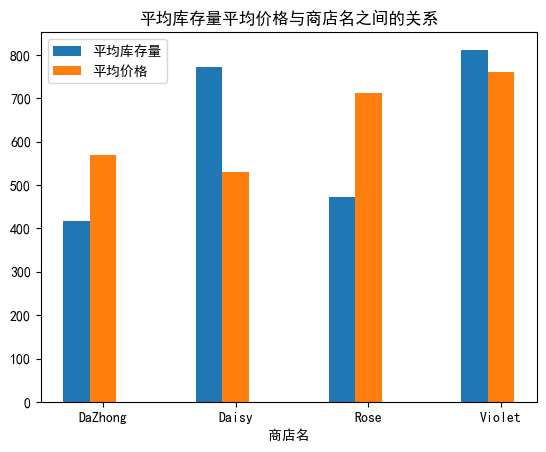

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']

data = pd.read_csv(r'./data/sales_data.csv')

he=['stock_qty','price']
df2=data.groupby(by='store')[he].mean()
index_=df2.reset_index()

fig, ax = plt.subplots()

index=np.arange(len(index_['store']))

bar_width=0.2

plt.bar(index,index_['stock_qty'],bar_width,label='平均库存量')
plt.bar(index+bar_width*1,index_['price'],bar_width,label='平均价格')
                
plt.xticks(index+bar_width,index_['store'])

plt.legend()

ax.set(xlabel='商店名',
       title='平均库存量平均价格与商店名之间的关系')

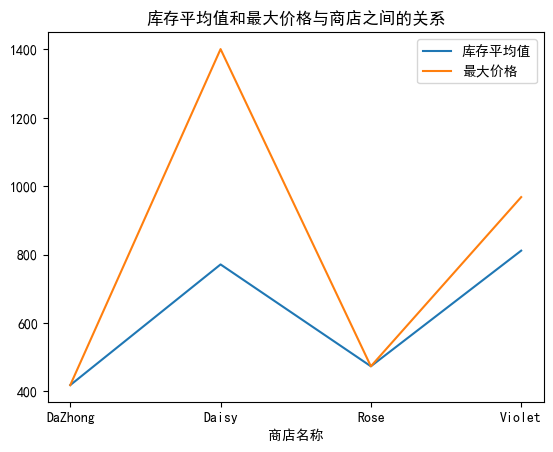

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']

data = pd.read_csv(r'./data/sales_data.csv')

df3 = data.groupby(by='store')['stock_qty'].agg([("库存平均值",'mean'),("最大价格",'max')])

df3 = df3.reset_index()

fig, ax = plt.subplots()

ax.plot(df3['store'], df3['库存平均值'], label='库存平均值') 
ax.plot(df3['store'], df3['最大价格'], label='最大价格')  

ax.legend(["库存平均值","最大价格"])
ax.set(xlabel='商店名称', ylabel='',
       title='库存平均值和最大价格与商店之间的关系')

plt.show()

[Text(0.5, 0, '商店名'), Text(0.5, 1.0, '每个店铺的平均库存数量、最大库存数量、产品销售的均价以及产品销量最大值')]

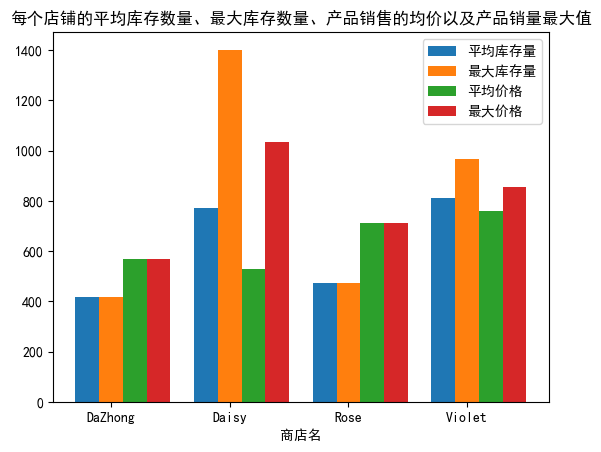

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']

data = pd.read_csv(r'./data/sales_data.csv')

he=['stock_qty','price']
df2=data.groupby(by='store')[he].agg([('平均值','mean'),('最大值','max')])
df2=df2.reset_index()

fig, ax = plt.subplots()

index=np.arange(len(df2['store']))

bar_width=0.2

plt.bar(index,df2['stock_qty','平均值'],bar_width,label='平均库存量')
plt.bar(index+bar_width*1,df2['stock_qty','最大值'],bar_width,label='最大库存量')
plt.bar(index+bar_width*2,df2['price','平均值'],bar_width,label='平均价格')
plt.bar(index+bar_width*3,df2['price','最大值'],bar_width,label='最大价格')

plt.xticks(index+bar_width,df2['store'])

plt.legend()

ax.set(xlabel='商店名',
       title='每个店铺的平均库存数量、最大库存数量、产品销售的均价以及产品销量最大值')

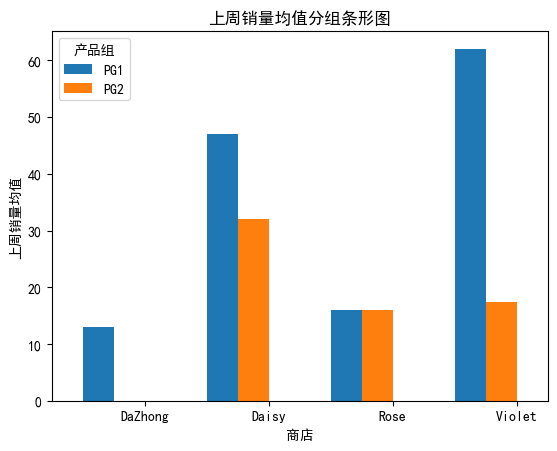

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']

data = pd.read_csv(r'./data/sales_data.csv')

he = ['store','product_group']

df = data.groupby(by=he)['last_week_sales'].agg([('上周销量均值','mean')])

df=df.reset_index()

pivot_df = df.pivot(index='store', columns='product_group', values='上周销量均值')  
 
fig, ax = plt.subplots()  
pivot_df.plot(kind='bar', ax=ax, stacked=False, width=0.5, position=1)  
   
ax.set_title('上周销量均值分组条形图')  
ax.set_xlabel('商店')  
ax.set_ylabel('上周销量均值')  
ax.set_xticklabels(pivot_df.index, rotation=0)   

ax.legend(title='产品组')  
    
plt.show()

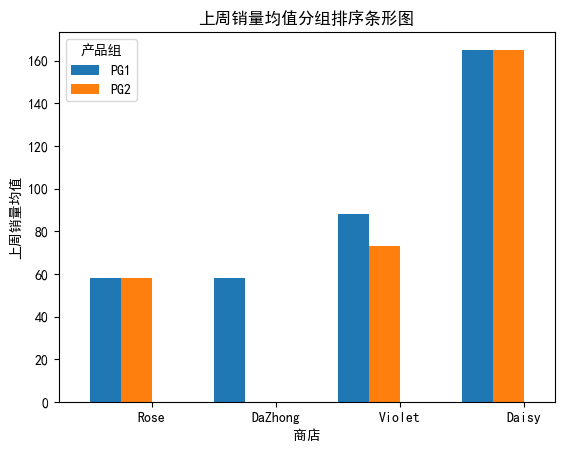

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']

data = pd.read_csv(r'./data/sales_data.csv')

df = data.groupby(by=he)['last_month_sales'].agg([('上周销量均值','mean')])

df=df.reset_index()
df=df.pivot(index='store', columns='product_group', values='上周销量均值')
df=df.sort_values(by=['PG1','PG2'])



fig, ax = plt.subplots()  
df.plot(kind='bar', ax=ax, stacked=False, width=0.5, position=1)  

ax.set_title('上周销量均值分组排序条形图')  
ax.set_xlabel('商店')  
ax.set_ylabel('上周销量均值')  
ax.set_xticklabels(df.index, rotation=0)   

ax.legend(title='产品组')  
    
plt.show()

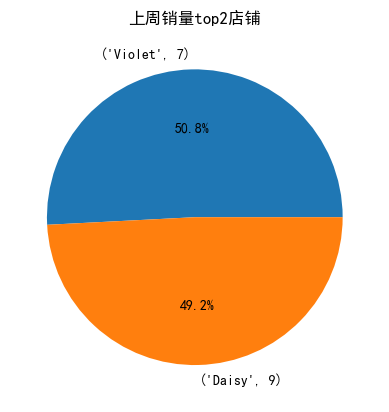

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']

data = pd.read_csv(r'./data/sales_data.csv')

df=data.groupby(by = 'store')['last_week_sales'].nlargest(2)

df=df.sort_values(ascending=False)

df=df.head(2)
df.reset_index()

fig, ax = plt.subplots()  

ax.pie(df.values,labels=df.index,autopct='%1.1f%%')
ax.set_title('上周销量top2店铺') 

plt.show()